<a href="https://colab.research.google.com/github/PKpacheco/autoencoders-assign5-uml/blob/main/Assignment_5_Autoencoders_UML_Paola_Pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 - Unsupervised Machine Learning

Paola Katherine Pacheco - 0374446


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


## 1.Data


### a)Each row of csvImages 10k x 784.csv contains the gray scale values of a 28 x 28 image. Load this data into a pandas dataframe. Convert the dataframe to a numpy array using pandas.values. Print the shape of the data.


In [2]:
# import files
train_label_url = 'https://raw.githubusercontent.com/PKpacheco/autoencoders-assign5-uml/main/csvTrainLabel%2060k%20x%201.csv'
test_label_url = 'https://raw.githubusercontent.com/PKpacheco/autoencoders-assign5-uml/main/csvTestLabel%2010k%20x%201.csv'

# drive files
train_images_url = '/content/drive/MyDrive/Colab Notebooks/unsuperv ML/autoencoders_assign5/csvTrainImages 60k x 784.csv'
test_images_url = '/content/drive/MyDrive/Colab Notebooks/unsuperv ML/autoencoders_assign5/csvTestImages 10k x 784.csv'

In [3]:
# Load train and test labels
Y_train = pd.read_csv(train_label_url).values
Y_test = pd.read_csv(test_label_url).values

# Load train and test images
X_train = pd.read_csv(train_images_url).values
X_test = pd.read_csv(test_images_url).values

In [4]:
# Print the shapes
print("Shape of train labels:", Y_train.shape)
print("Shape of test labels:", Y_test.shape)
print("Shape of train images:", X_train.shape)
print("Shape of test images:", X_test.shape)

Shape of train labels: (59999, 1)
Shape of test labels: (9999, 1)
Shape of train images: (59999, 784)
Shape of test images: (9999, 784)


These shapes indicate that:
* (59999, 1) - 59,999 training images and 1 column
* (9999, 784) - 9,999 images and 784 columns


###b)Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using numpy.ndarray.reshape. Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first five images using the 'gray' colour map. In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional).


In [9]:
# Normalize
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0


In [67]:
# one hot encoding
# from keras import utils
# Y_train = utils.to_categorical(Y_train)
# Y_test = utils.to_categorical(Y_test)

In [10]:
# Reshape each image to be 28 x 28
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28)

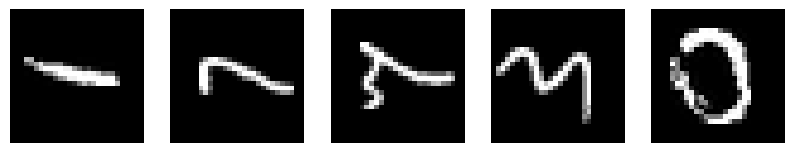

In [11]:
# Plot
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_reshaped[i], cmap='gray')
    plt.axis('off')
plt.show()

In [12]:
X_train_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# Reshape to be 784 one dimensional
X_train_flattened = X_train_normalized.reshape(-1, 784)

In [14]:
# double check shape
X_train_flattened.shape

(59999, 784)

## 2.Modeling


###a)Use keras.layers to create an input layer that matches the dimensions of your data.



In [15]:
# input layer
input_layer = Input(shape=(784,))

###b)Use keras.layers to create an encoding stage that has at least two layers and reduces the size of the data to 50% or less (less is better). You will need to choose activation functions.


In [16]:
# encoding layers
encoding_layer1 = Dense(256, activation='relu')(input_layer)
encoding_layer2 = Dense(128, activation='relu')(encoding_layer1)

# model
encoding_model = Model(inputs=input_layer, outputs=encoding_layer2)

# summary
encoding_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
Total params: 233856 (913.50 KB)
Trainable params: 233856 (913.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###c)Use keras.layers to create a decoding stage that has at least two layers and restores the data to its original size. You will need to choose activation functions.


In [17]:
# decoding layers
decoding_layer1 = Dense(256, activation='relu')(encoding_layer2)
decoding_layer2 = Dense(784, activation='sigmoid')(decoding_layer1)

# decoding model
decoding_model = Model(inputs=input_layer, outputs=decoding_layer2)

# summary
decoding_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 784)               201488    
                                                                 
Total params: 468368 (1.79 MB)
Trainable params: 468368 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###d)Compile the complete autoencoder network. You will need to choose a loss function and an optimizer. Train the autoencoder using the image data.


In [19]:
# autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoding_layer2)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train_flattened, X_train_flattened, epochs=5, batch_size=128, validation_data=(X_test_normalized, X_test_normalized))


Epoch 1/5
469/469 [==============================] - 13s 27ms/step - loss: 0.0386 - val_loss: 0.0076
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0162 - val_loss: 0.0030
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0100 - val_loss: 0.0013
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0079 - val_loss: 8.1233e-04
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0065 - val_loss: 5.1904e-04


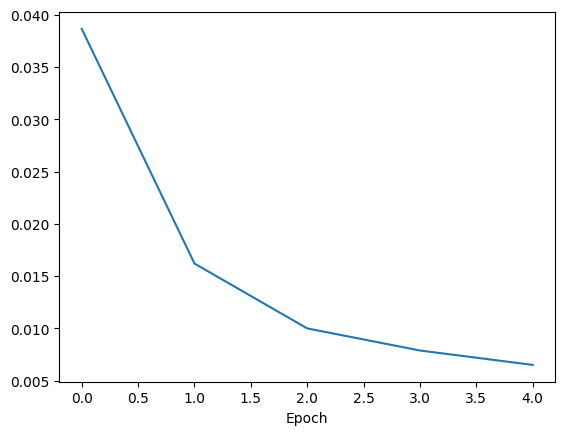

In [22]:
#  training loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.show()


This loss curve shows that the autoencoder is learning and we can see progress redutiin the error.
More epochs loss still decrease.

###e)Compile an encoder network from your trained input layer and encoding stage.

In [23]:
# Create an encoder network
encoder_network = Model(inputs=input_layer, outputs=encoding_layer2)

# Compile the encoder network
encoder_network.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the encoder network
encoder_network.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
Total params: 233856 (913.50 KB)
Trainable params: 233856 (913.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3.Conclusions


###a)Use matplotlib.plot.imshow and matplotlib.plot.subplot and your trained models to give a plot of the first five original images along the top row, the encoded versions of those same images along the second row, and the decoded versions along the bottom row. Return to question 2 and adjust the hyperparameters of your model until you are able to produce decoded images that represent the original images, with an encoding that uses as little data as possible; make a record of the adjustments you try in markdown.


In [24]:
# get irst five images
sample_images = X_train_normalized[:5]

# Encode
encoded_images = encoder_network.predict(sample_images)

# decode the encoded images
decoded_images = autoencoder.predict(sample_images)

1/1 [==============================] - 0s 74ms/step


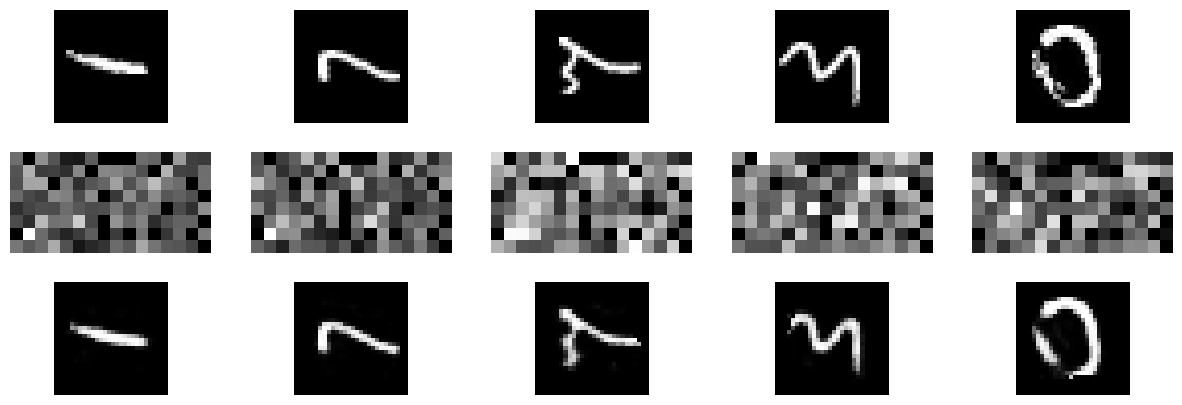

In [25]:
# 3 rows
plt.figure(figsize=(15, 5))

# =original images 1st row
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

# encoded images 2nd row
for i in range(5):
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoded_images[i].reshape(8, 16), cmap='gray')
    plt.axis('off')

# decoded images 3rd row
for i in range(5):
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

###b)Use markdown to describe how well the autoencoder is working, making reference to the plots.


The autoencoder goes through 2 steps, encoding the input data and decoding where it must reconstruct the data that was compressed in the input.

During plotting, input, encoding and decoding by lines of the graph above, we compared that the first and third lines are very similar, the images were reconstructed very accurately, the images are similar to the original.

###c)State the amount of data needed to store a single image, considering that a floating-point number is 4 bytes of data. Calculate how much memory will be saved as a percentage.

```
Saving memory => (1 - (Encoded Data Size / Original Data Size)) * 100%
```

* original image => 28 x 28 x 4 bytes
* encoded data size => number neuron encoding layer 128 * neuron (4 bytes)
* saving memory = (1 - (128 * 4) / (28 * 28 * 4)) * 100% => 83.67%


This shows a huge reduction in memory usage.